### Imports

In [5]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,RandomFlip,RandomRotation,RandomZoom
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import json
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter

In [3]:
train_dir = r'C:/Users/mikow/Desktop/pokemon-dataset-1000/train'
val_dir = r'C:/Users/mikow/Desktop/pokemon-dataset-1000/val'
test_dir = r'C:/Users/mikow/Desktop/pokemon-dataset-1000/test'

### Data augmentation

In [2]:
#   data_augmentation = tf.keras.Sequential([
#      RandomFlip("horizontal"),
#     RandomRotation(0.1),
#      RandomZoom(0.1),
#  ])

# # # augmentation and saving images
# def augment_and_save_images(input_dir, output_dir, num_augmentations=1):
#      for class_name in os.listdir(input_dir):
#          class_dir = os.path.join(input_dir, class_name)
#          augmented_class_dir = os.path.join(output_dir, class_name)
#          os.makedirs(augmented_class_dir, exist_ok=True)

#          for image_name in os.listdir(class_dir):
#             image_path = os.path.join(class_dir, image_name)
#             img = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
#             img_array = tf.keras.preprocessing.image.img_to_array(img)

#             # generating images
#          for i in range(num_augmentations):
#                  augmented_image = data_augmentation(tf.expand_dims(img_array, 0))
#                  augmented_image = tf.squeeze(augmented_image, axis=0)  
#                  augmented_image_path = os.path.join(augmented_class_dir, f"aug_{i}_{image_name}")
#                  tf.keras.preprocessing.image.array_to_img(augmented_image).save(augmented_image_path)
#                  print(f"Zapisano: {augmented_image_path}")

# # saving
# augment_and_save_images(r'C:/Users/mikow/Desktop/pokemon-dataset-1000/val', r'C:/Users/mikow/Desktop/pokemon-dataset-1000/val')

### Loading data and preprocessing


In [9]:
testing_set = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 323 files belonging to 101 classes.


In [153]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 262 files belonging to 100 classes.


In [155]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 8164 files belonging to 100 classes.


In [157]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 100), dtype=tf.float32, name=None))>

### Data check


Training Data Summary:
Class: abomasnow, Count: 128
Class: abra, Count: 128
Class: absol, Count: 120
Class: accelgor, Count: 64
Class: aegislash-shield, Count: 48
Class: aerodactyl, Count: 128
Class: aggron, Count: 120
Class: aipom, Count: 128
Class: alakazam, Count: 128
Class: alcremie, Count: 40
Class: alomomola, Count: 64
Class: altaria, Count: 120
Class: amaura, Count: 48
Class: ambipom, Count: 128
Class: amoonguss, Count: 64
Class: ampharos, Count: 128
Class: annihilape, Count: 16
Class: anorith, Count: 120
Class: appletun, Count: 40
Class: applin, Count: 40
Class: araquanid, Count: 48
Class: arbok, Count: 128
Class: arboliva, Count: 16
Class: arcanine, Count: 128
Class: arceus, Count: 100
Class: archen, Count: 64
Class: archeops, Count: 64
Class: arctibax, Count: 16
Class: arctovish, Count: 40
Class: arctozolt, Count: 40
Class: ariados, Count: 128
Class: armaldo, Count: 120
Class: armarouge, Count: 16
Class: aromatisse, Count: 64
Class: aron, Count: 120
Class: arrokuda, Count: 4

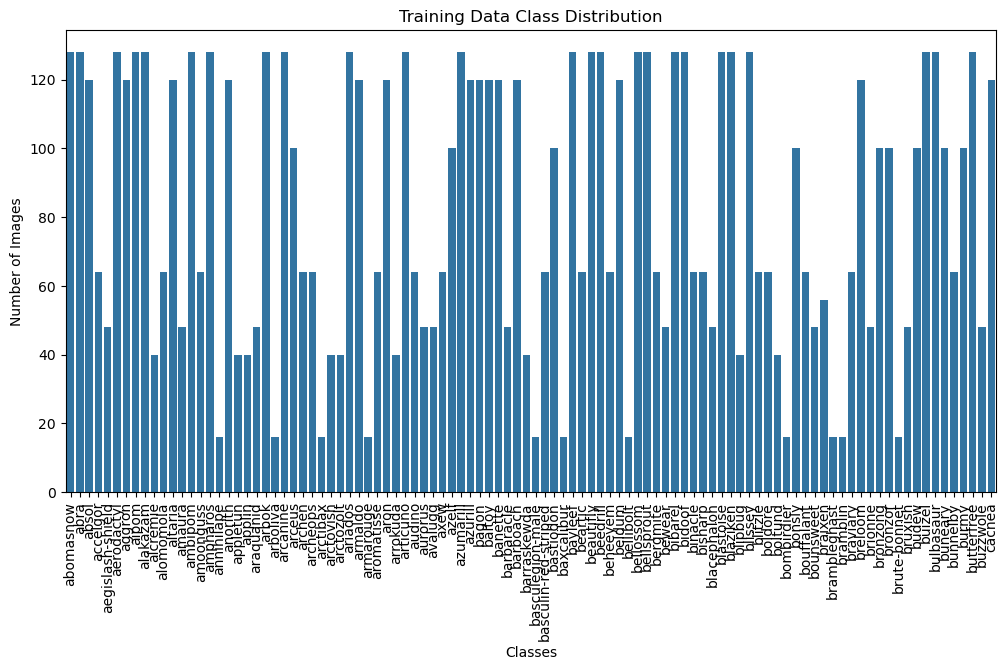

In [160]:
def data_summary(dataset_dir, dataset_name):
    class_counts = Counter()

    # counting the number of images
    for cls in os.listdir(dataset_dir):
        class_path = os.path.join(dataset_dir, cls)
        if os.path.isdir(class_path):
            class_counts[cls] = len(os.listdir(class_path))
    
    # viewing the number of images
    print(f"\n{dataset_name} Data Summary:")
    for cls, count in class_counts.items():
        print(f"Class: {cls}, Count: {count}")

    # visualization
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
    plt.title(f"{dataset_name} Data Class Distribution")
    plt.xlabel("Classes")
    plt.ylabel("Number of Images")
    plt.xticks(rotation=90)
    plt.show()

# summary
data_summary(train_dir, "Training")

### Building Model


In [163]:
model = Sequential()

In [165]:
# convolutional layers and pooling layers 
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [167]:
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Dropout(0.2))

In [169]:
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [171]:
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [173]:
model.add(Flatten())

In [175]:
model.add(Dense(units=1024,activation='relu'))

In [177]:
model.add(Dense(units=100,activation='softmax'))

### Training model

In [180]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [182]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 30, 30, 64)       

In [184]:
training = model.fit(x=training_set,validation_data=validation_set,epochs=12)

Epoch 1/12
256/256 [==============================] - 47s 183ms/step - loss: 4.1776 - accuracy: 0.2347 - val_loss: 1.9010 - val_accuracy: 0.5153
Epoch 2/12
256/256 [==============================] - 48s 187ms/step - loss: 1.1954 - accuracy: 0.6868 - val_loss: 1.2483 - val_accuracy: 0.7901
Epoch 3/12
256/256 [==============================] - 48s 187ms/step - loss: 0.5198 - accuracy: 0.8552 - val_loss: 1.0319 - val_accuracy: 0.8511
Epoch 4/12
256/256 [==============================] - 47s 184ms/step - loss: 0.2597 - accuracy: 0.9236 - val_loss: 1.3550 - val_accuracy: 0.8359
Epoch 5/12
256/256 [==============================] - 47s 185ms/step - loss: 0.2525 - accuracy: 0.9268 - val_loss: 1.3206 - val_accuracy: 0.8588
Epoch 6/12
256/256 [==============================] - 47s 182ms/step - loss: 0.1470 - accuracy: 0.9582 - val_loss: 1.2889 - val_accuracy: 0.8740
Epoch 7/12
256/256 [==============================] - 47s 184ms/step - loss: 0.1193 - accuracy: 0.9683 - val_loss: 1.1904 - val_ac

In [51]:
train_loss = model.evaluate(training_set)

256/256 [==============================] - 57s 224ms/step - loss: 0.0186 - accuracy: 0.9958


### Saving Model

In [52]:
model.save("trained_model.keras")

In [53]:
training.history

{'loss': [4.32567834854126,
  1.3034160137176514,
  0.5122936964035034,
  0.25106167793273926,
  0.15007458627223969,
  0.06683916598558426,
  0.051435478031635284,
  0.06471166759729385,
  0.05842801183462143,
  0.049948856234550476,
  0.02505461685359478,
  0.020365741103887558],
 'accuracy': [0.2098236232995987,
  0.6611955165863037,
  0.8541156053543091,
  0.9267516136169434,
  0.9566389322280884,
  0.9796668291091919,
  0.9855462908744812,
  0.9824841022491455,
  0.9854238033294678,
  0.9864037036895752,
  0.9943655133247375,
  0.9949779510498047],
 'val_loss': [2.0847442150115967,
  0.9019612669944763,
  0.7152224779129028,
  0.6948415637016296,
  0.9578457474708557,
  0.8077229261398315,
  0.8263261318206787,
  0.8437018990516663,
  0.7308274507522583,
  0.8586112856864929,
  1.0180346965789795,
  0.7462413311004639],
 'val_accuracy': [0.5267175436019897,
  0.805343508720398,
  0.8625954389572144,
  0.8702290058135986,
  0.847328245639801,
  0.9007633328437805,
  0.8854961991310

In [54]:
training_history = training.history


In [55]:
with open("training_history.json","w") as f:
    json.dump(training_history,f)

### Predicting Model

In [61]:
class_name = validation_set.class_names

In [63]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 262 files belonging to 100 classes.


In [65]:
y_pred = model.predict(validation_set)
y_pred, y_pred.shape

9/9 [==============================] - 2s 210ms/step


(array([[9.9999934e-01, 1.6949501e-20, 1.5521255e-09, ..., 1.3123306e-14,
         8.9694337e-18, 2.0484452e-10],
        [9.9999994e-01, 6.5719737e-19, 3.4154160e-09, ..., 6.4531146e-15,
         1.3687736e-15, 1.5774513e-15],
        [9.9921471e-01, 1.9737165e-19, 5.8305819e-08, ..., 3.3499956e-09,
         4.5212158e-09, 7.2357176e-10],
        ...,
        [4.6890976e-17, 5.1986909e-13, 2.7430064e-16, ..., 2.8657385e-20,
         2.2547041e-13, 9.9997604e-01],
        [6.4044452e-16, 4.5226917e-12, 1.3600739e-15, ..., 1.4657349e-15,
         9.1773405e-16, 9.9981135e-01],
        [7.7532354e-14, 2.6677224e-05, 9.3555155e-12, ..., 4.1186918e-19,
         3.1402856e-09, 5.5425465e-01]], dtype=float32),
 (262, 100))

In [67]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [69]:
predicted_categories

<tf.Tensor: shape=(262,), dtype=int64, numpy=
array([ 0,  0,  0,  0,  1,  1,  1,  5, 29,  2,  2,  3,  3, 24,  5,  5,  5,
        5,  6,  6,  6, 17,  7,  7,  7,  8,  8,  8,  8,  9, 10, 10, 11, 11,
       11, 12, 13, 13, 13, 13, 14,  9, 15, 76, 15, 15, 16, 16, 16, 17, 17,
       17, 18, 19, 20, 21,  5, 21, 21, 22, 22, 22, 23, 23, 23, 23, 24, 24,
       24, 25, 25, 26, 26, 27, 27, 27, 28, 48, 30, 30, 30, 30, 37, 98, 31,
       32, 32, 32, 33, 67, 34, 34, 34, 35, 36, 36, 36, 36, 37, 37, 38, 39,
       40, 40, 41, 84, 41, 42, 42, 42, 42, 43, 43, 43, 44, 44, 31, 45, 45,
       78, 46, 46, 26, 47, 48,  0, 48, 49, 50, 50, 50, 51, 51, 52, 52, 52,
       53, 53, 53, 54, 54, 54, 54, 55, 55, 56, 56, 56, 56, 57, 57, 70, 57,
       58, 58, 59, 59, 59, 60, 60, 60, 61, 61, 61, 61, 62, 62, 62, 62, 63,
       88, 64, 65, 65, 65, 65, 66, 66, 66, 66, 11, 67, 68, 68, 69, 70, 70,
       70, 70, 71, 23, 71, 71, 72, 73, 73, 73, 73, 96, 74, 75, 75, 76, 77,
       77, 77, 78, 61, 78, 79, 79, 78, 81, 82, 82, 82,

In [71]:
true_categories = tf.concat([y for x,y in validation_set], axis=0)
true_categories

<tf.Tensor: shape=(262, 100), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [73]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(262,), dtype=int64, numpy=
array([ 0,  0,  0,  0,  1,  1,  1,  1,  2,  2,  2,  3,  3,  4,  5,  5,  5,
        5,  6,  6,  6,  7,  7,  7,  7,  8,  8,  8,  8,  9, 10, 10, 11, 11,
       11, 12, 13, 13, 13, 13, 14, 14, 15, 15, 15, 15, 16, 16, 16, 17, 17,
       17, 18, 19, 20, 21, 21, 21, 21, 22, 22, 22, 23, 23, 23, 23, 24, 24,
       24, 25, 25, 26, 26, 27, 27, 27, 28, 29, 30, 30, 30, 30, 31, 31, 31,
       32, 32, 32, 33, 33, 34, 34, 34, 35, 36, 36, 36, 36, 37, 37, 38, 39,
       40, 40, 41, 41, 41, 42, 42, 42, 42, 43, 43, 43, 44, 44, 44, 45, 45,
       45, 46, 46, 46, 47, 48, 48, 48, 49, 50, 50, 50, 51, 51, 52, 52, 52,
       53, 53, 53, 54, 54, 54, 54, 55, 55, 56, 56, 56, 56, 57, 57, 57, 57,
       58, 58, 59, 59, 59, 60, 60, 60, 61, 61, 61, 61, 62, 62, 62, 62, 63,
       63, 64, 65, 65, 65, 65, 66, 66, 66, 66, 67, 67, 68, 68, 69, 70, 70,
       70, 70, 71, 71, 71, 71, 72, 73, 73, 73, 73, 74, 74, 75, 75, 76, 77,
       77, 77, 78, 78, 78, 79, 79, 80, 81, 82, 82, 82,

In [75]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                      precision    recall  f1-score   support

           abomasnow       0.80      1.00      0.89         4
                abra       1.00      0.75      0.86         4
               absol       1.00      0.67      0.80         3
            accelgor       1.00      1.00      1.00         2
    aegislash-shield       0.00      0.00      0.00         1
          aerodactyl       0.67      1.00      0.80         4
              aggron       1.00      1.00      1.00         3
               aipom       1.00      0.75      0.86         4
            alakazam       1.00      1.00      1.00         4
            alcremie       0.50      1.00      0.67         1
           alomomola       1.00      1.00      1.00         2
             altaria       0.75      1.00      0.86         3
              amaura       1.00      1.00      1.00         1
             ambipom       1.00      1.00      1.00         4
           amoonguss       1.00      0.50      0.67         2
       

C:\Users\mikow\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mikow\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mikow\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Confusion Matrix

In [78]:
cm = confusion_matrix(Y_true,predicted_categories)
cm.shape

(100, 100)

Text(470.72222222222223, 0.5, 'Actual Class')

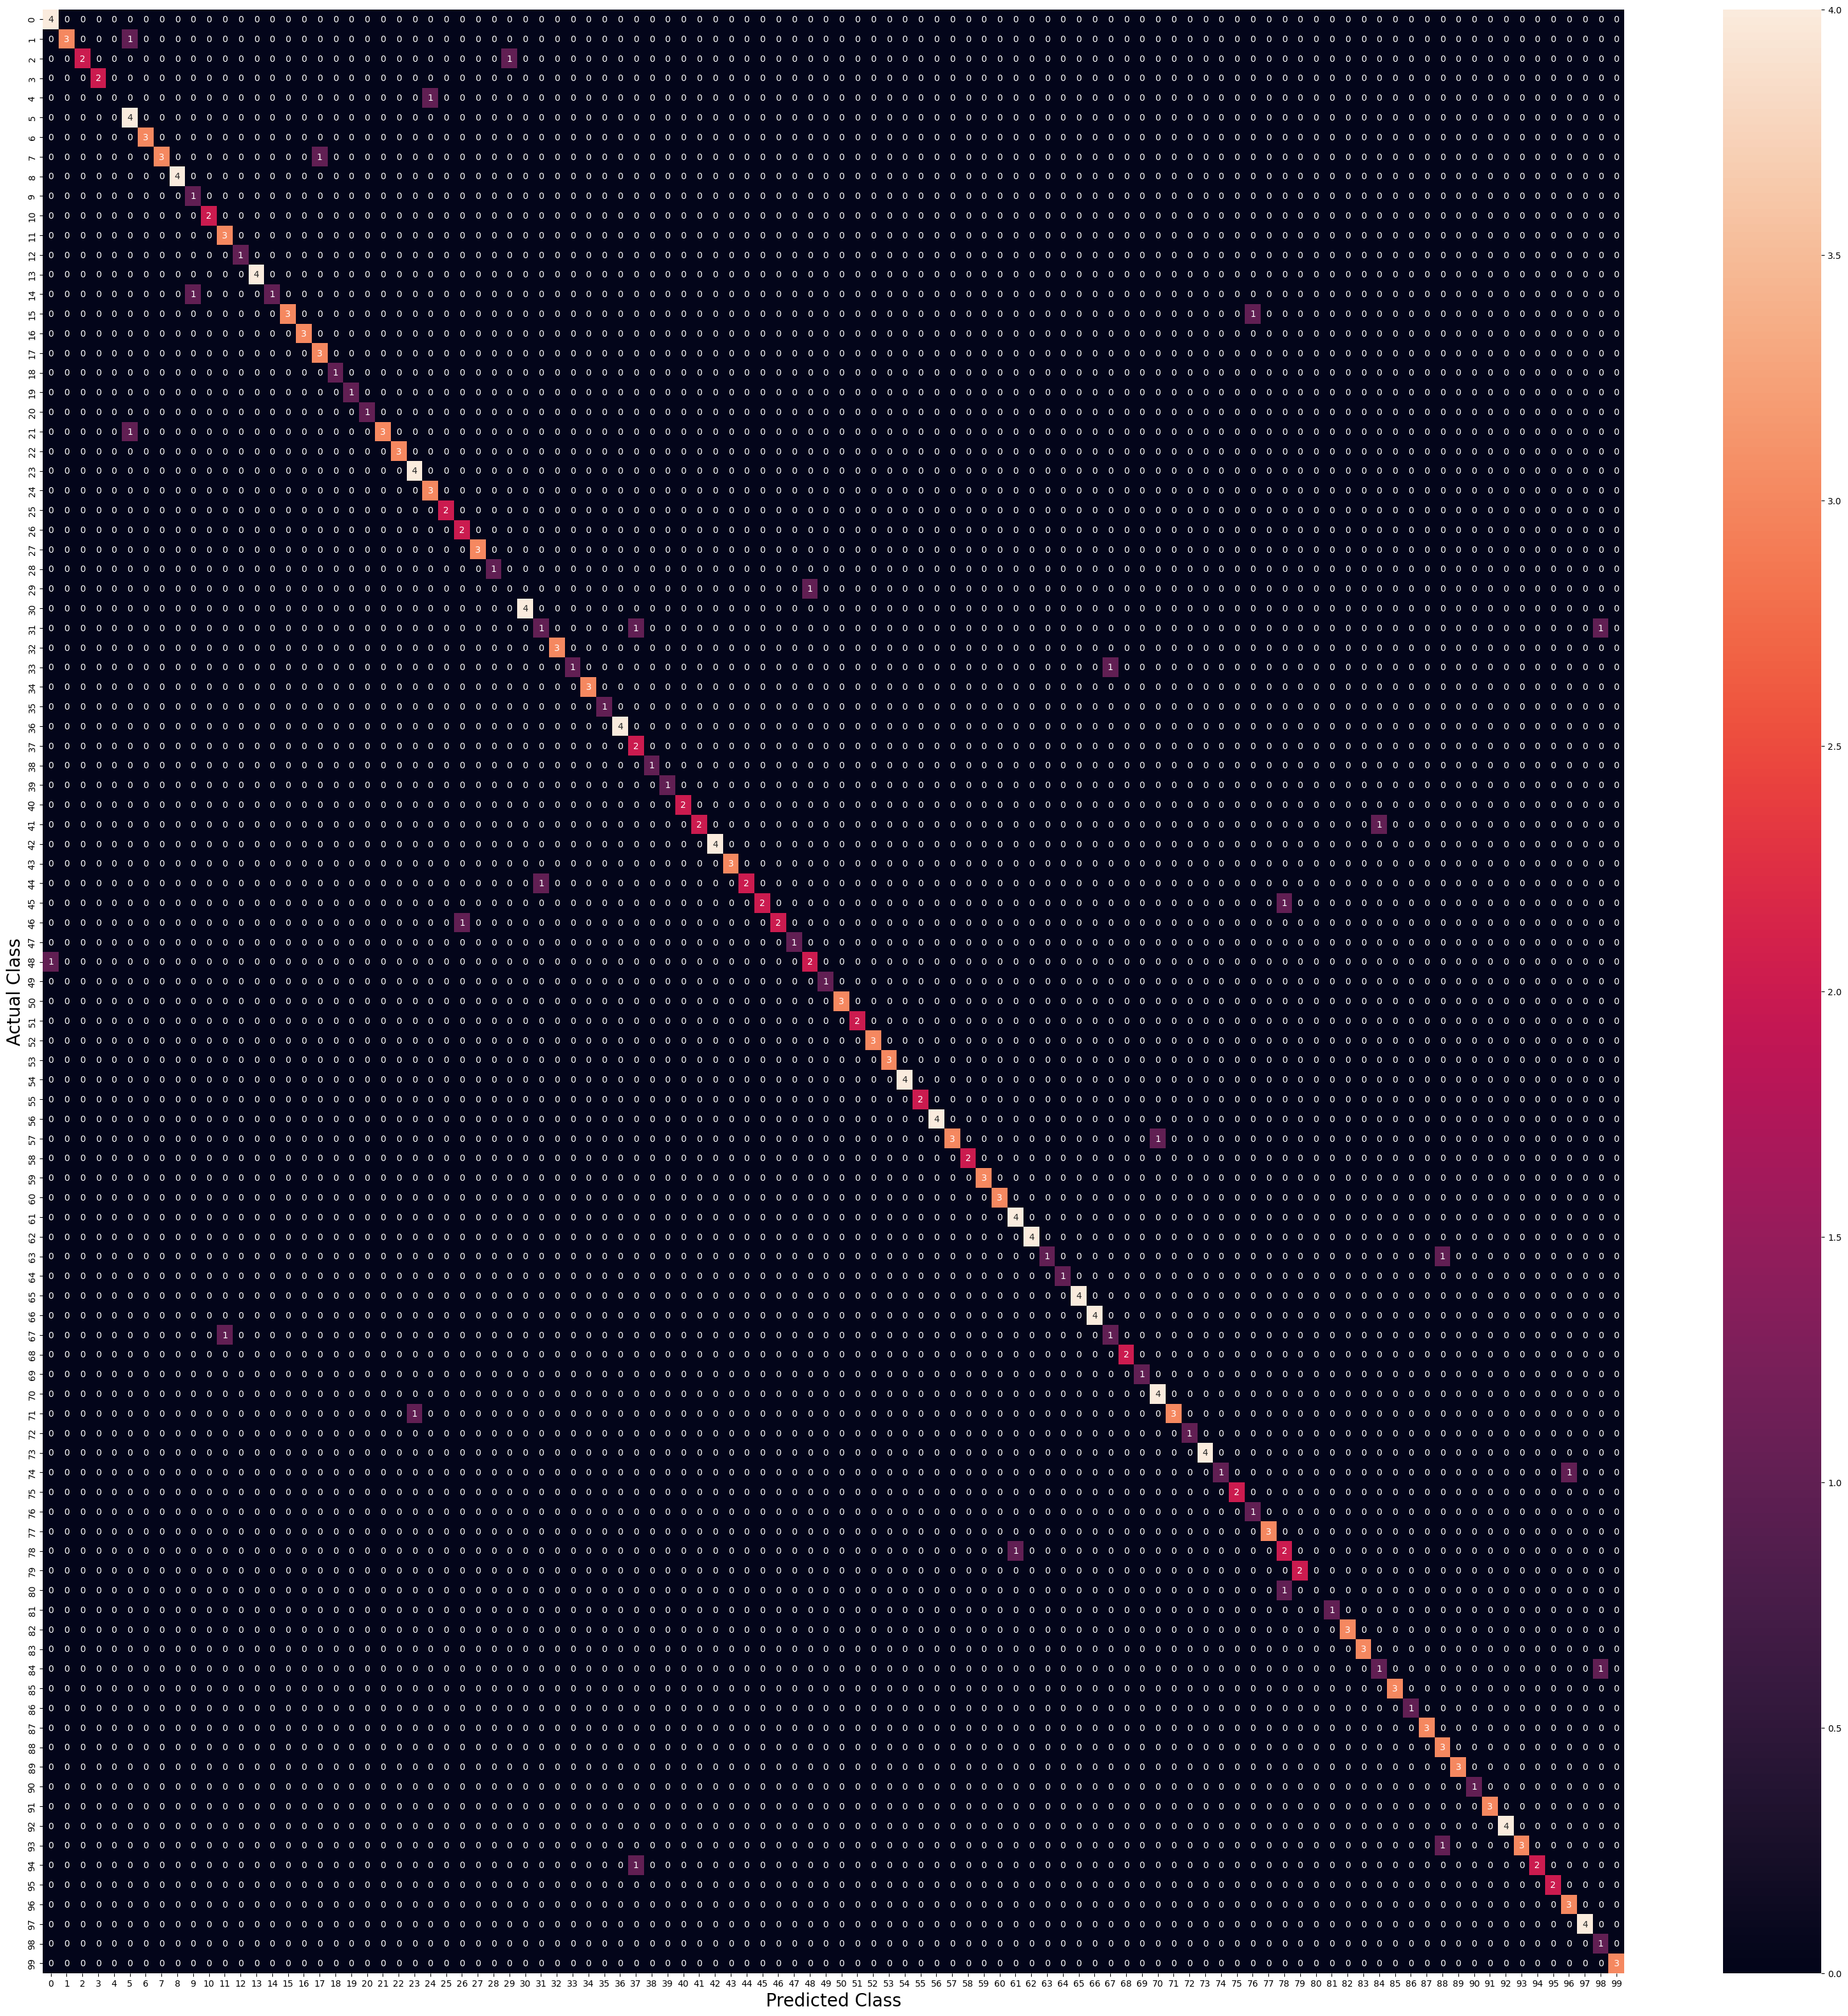

In [80]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)

### Testing image augmentation

In [13]:
data_augmentation = tf.keras.Sequential([
     RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1),
  ])

In [15]:
with open('class_names.json', 'w') as f:
    json.dump(training_set.class_names, f)

NameError: name 'training_set' is not defined

In [ ]:
image_path = r"C:/Users/mikow/Desktop/pokemon-dataset-1000/train/aegislash-shield/aegislash-shield_2.png"

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
image_array = tf.keras.preprocessing.image.img_to_array(image)
image_array = tf.expand_dims(image_array, axis=0)

In [89]:
plt.figure(figsize=(1, 1))
augmented_image = data_augmentation(image_array,training=True)
plt.imshow(tf.keras.preprocessing.image.array_to_img(augmented_image[0]))  # Konwersja obrazu do formatu wyświetlania
plt.axis('off')

plt.show()

NameError: name 'data_augmentation' is not defined

<Figure size 100x100 with 0 Axes>